#### 시계열 상관 분석

- 시간에 따라 변하는 두 변수사이의 상관관계를 평가하는 통계적 기술
- 두 변수 간의 선형 또는 비선형관계를 파악

In [21]:
import os

In [17]:
import pandas as pd
import random

# 랜덤하게 각 주식의 가격 100개의 데이터 생성 - Samsung
dates = pd.date_range(start='2021-01-04', periods=100, freq='D')
samsung_prices = [random.randint(80000,90000) for _ in range(100)]
samsung_data = {'Date':dates,'005930.KS':samsung_prices}
samsung_df = pd.DataFrame(samsung_data)
samsung_df.set_index('Date', inplace=True)

# 랜덤하게 각 주식의 가격 100개의 데이터 생성 - LG
dates = pd.date_range(start='2021-01-04', periods=100, freq='D')
lg_prices = [random.randint(50000,60000) for _ in range(100)]
lg_data = {'Date':dates,'066570.KS':lg_prices}
lg_df = pd.DataFrame(lg_data)
lg_df.set_index('Date', inplace=True)

print(samsung_df, lg_df)

            005930.KS
Date                 
2021-01-04      86415
2021-01-05      83555
2021-01-06      86736
2021-01-07      86323
2021-01-08      81859
...               ...
2021-04-09      81177
2021-04-10      85356
2021-04-11      87653
2021-04-12      81689
2021-04-13      84668

[100 rows x 1 columns]             066570.KS
Date                 
2021-01-04      55699
2021-01-05      53321
2021-01-06      52448
2021-01-07      55403
2021-01-08      55711
...               ...
2021-04-09      50039
2021-04-10      57447
2021-04-11      54444
2021-04-12      50335
2021-04-13      50847

[100 rows x 1 columns]


In [18]:
#  두 데이터 프레임을 합치기
df = pd.concat([samsung_df,lg_df],axis=1)
df =df.loc[:,['005930.KS','066570.KS']]
df.columns = ['Samsung','LG']

In [22]:
# 폴더 생성
os.makedirs("../00_DataEx/99_Output", exist_ok=True)

# 저장
df.to_csv("../00_DataEx/99_Output/stock_price.csv")

In [26]:
# csv 읽기
df = pd.read_csv("../00_DataEx/99_Output/stock_price.csv")
df['Date']  = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
print(df)

# 두 종목의 수익률 계산
returns = df.pct_change()
print(returns)

            Samsung     LG
Date                      
2021-01-04    86415  55699
2021-01-05    83555  53321
2021-01-06    86736  52448
2021-01-07    86323  55403
2021-01-08    81859  55711
...             ...    ...
2021-04-09    81177  50039
2021-04-10    85356  57447
2021-04-11    87653  54444
2021-04-12    81689  50335
2021-04-13    84668  50847

[100 rows x 2 columns]
             Samsung        LG
Date                          
2021-01-04       NaN       NaN
2021-01-05 -0.033096 -0.042694
2021-01-06  0.038071 -0.016373
2021-01-07 -0.004762  0.056342
2021-01-08 -0.051713  0.005559
...              ...       ...
2021-04-09 -0.011688 -0.095070
2021-04-10  0.051480  0.148045
2021-04-11  0.026911 -0.052274
2021-04-12 -0.068041 -0.075472
2021-04-13  0.036468  0.010172

[100 rows x 2 columns]


In [27]:
# 수익률 간의 상관 계수 계산
corr_matrix = returns.corr()
print(corr_matrix)

          Samsung        LG
Samsung  1.000000  0.273511
LG       0.273511  1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

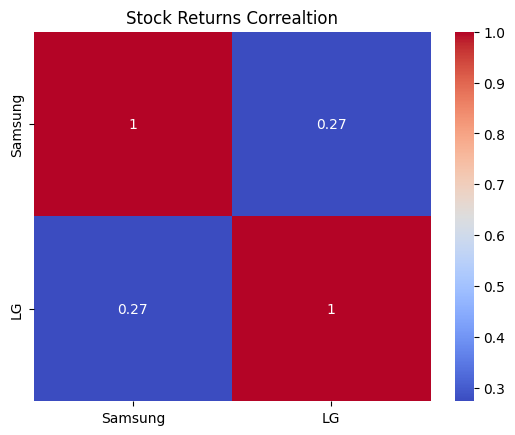

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히트맵 그리기

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Stock Returns Correaltion')
plt.show